<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:center; padding:15px;">
<h1 style='border-bottom:1px solid #2F4F4F; color:#2F4F4F; padding-bottom:5px;'><center>Machine Learning in Healthcare: Predicting chronic kidney disease (CKD) using machine learning</center></h2>
<h3 style='color:#2F4F4F;'><center>Group V</center></h3>
<h4 style='color:#2F4F4F;'><center>By: Yogev Ladani and Niv levi </center></h4>
<h4 style='color:#2F4F4F;'><center>Lecturer: Phd. Orit Raphaeli</center></h4>
</div>

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h1 style='border-bottom:1px solid #2F4F4F; color:#2F4F4F; padding-bottom:5px;'><center>Libraries Importing</h1>

</div>

In [3]:
pip install -r https://raw.githubusercontent.com/nivlevi1/Predicting-chronic-kidney-disease-CKD-using-machine-learning/main/requirements.txt


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
#!pip install shap
#!pip install openpyxl
#!pip install imbalanced-learn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.cluster import KMeans
!pip install yellowbrick 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
import shap


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [5]:
df = pd.read_excel('CKD_dataset.xlsx', index_col=0)

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h1 style='border-bottom:1px solid #2F4F4F; color:#2F4F4F; padding-bottom:5px;'><center>1. Preprocessing and Exploration Data</h1>


</div>

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>1.1 Handling Missing Values</center></h2>
</div>

In [206]:
df.isna().sum()

Gender 0
AgeBaseline 0
Age.3.categories 0
HistoryDiabetes 0
HistoryCHD 0
HistoryVascular 0
HistorySmoking 0
HistoryHTN 0
HistoryDLD 0
HistoryObesity 0
DLDmeds 0
DMmeds 0
HTNmeds 0
ACEIARB 0
CholesterolBaseline 0
TriglyceridesBaseline 6
HgbA1C 15
CreatnineBaseline 0
eGFRBaseline 0
sBPBaseline 0
dBPBaseline 0
BMIBaseline 0
TimeToEventMonths 0
EventCKD35 0
dtype: int64

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">

**We have two columns with missing values - `TriglyceridesBaseline` and `HgbA1C`.**  
Before we handle the missing values, Let's understand what the columns hold.



</div>

In [207]:
df[['TriglyceridesBaseline', 'HgbA1C']].sample(5)

,TriglyceridesBaseline,HgbA1C
StudyID,,
30,1.60,7.30
195,1.09,6.20
81,0.73,6.20
292,0.81,6.43
388,0.69,5.80


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>1.2 Columns Description</center></h2>

- StudyID: A unique identifier for each study participant.
- Gender: Indicates the gender of the participant (0 or 1).
- AgeBaseline: The age of the participant at the baseline of the study.
- Age.3.categories: Age categorized into three groups.
- HistoryDiabetes: Indicates if the participant has a history of diabetes (0 or 1).
- HistoryCHD: Indicates if the participant has a history of coronary heart disease (CHD) (0 or 1).
- HistoryVascular: Indicates if the participant has a history of vascular diseases (0 or 1).
- HistorySmoking: Indicates if the participant has a history of smoking (0 or 1).
- HistoryHTN: Indicates if the participant has a history of hypertension (HTN) (0 or 1).
- HistoryDLD: Indicates if the participant has a history of dyslipidemia (DLD) (0 or 1).
- HistoryObesity: Indicates if the participant has a history of obesity (0 or 1).
- DLDmeds: Indicates if the participant is on medication for dyslipidemia (0 or 1).
- DMmeds: Indicates if the participant is on medication for diabetes mellitus (0 or 1).
- HTNmeds: Indicates if the participant is on medication for hypertension (0 or 1).
- ACEIARB: Indicates if the participant is on ACE inhibitors or ARBs (0 or 1).
- CholesterolBaseline: Baseline cholesterol levels of the participant.
- TriglyceridesBaseline: Baseline triglyceride levels of the participant.
- HgbA1C: Hemoglobin A1C levels of the participant, indicating blood sugar levels.
- CreatnineBaseline: Baseline creatinine levels of the participant, indicating kidney function.
- eGFRBaseline: Baseline estimated glomerular filtration rate (eGFR) of the participant, indicating kidney function.
- sBPBaseline: Baseline systolic blood pressure of the participant.
- dBPBaseline: Baseline diastolic blood pressure of the participant.
- BMIBaseline: Baseline Body Mass Index (BMI) of the participant.
- TimeToEventMonths: Time to event in months, likely indicating the time until the onset of CKD.
- EventCKD35: Indicates if the participant developed chronic kidney disease (CKD) during the study (0 or 1).

**[Lipid Profile (Triglycerides)](https://emedicine.medscape.com/article/2074115-overview?form=fpf)**  

**Reference Range**  
Triglycerides are lipid compounds composed of a glycerol esterified to 3 fatty acid chains of varying length and composition. These fatty acid chains can be saturated or unsaturated, and the chemical composition of each chain is different. Each chain consists of carbon and hydrogen atoms with varying single or double-bonded chains, depending on the degree of saturation or unsaturation. Triglycerides are formed of mixed chains, and the structural comparison between the chains is heterogenous in nature.

| Age Group           | Male (mg/dL) | Female (mg/dL) | Male (mmol/L) | Female (mmol/L) |
|---------------------|--------------|----------------|---------------|-----------------|
| Adult/Elderly       | 40-160       | 35-135         | 0.45-1.81     | 0.40-1.52       |
| Children (0-5 years)| 30-86        | 32-99          | -             | -               |
| Children (6-11 years)| 31-108       | 35-114         | -             | -               |
| Adolescents (12-15 years)| 36-138   | 41-138         | -             | -               |
| Young people (16-19 years)| 40-163 | 40-128         | -             | -               |

**[Hemoglobin A1C (HbA1C) Test](https://www.everlywell.com/blog/hba1c/what-is-normal-hba1c-by-age/)**

**What is a Hemoglobin A1C (HbA1C) Test?**  
A hemoglobin A1C (HbA1C) test is a blood test that shows your average blood sugar (glucose) level over the past two to three months. It measures the percentage of your red blood cells that have glucose-coated hemoglobin.

**Reference Range**  
A1C results tell you what percentage of your hemoglobin is coated with glucose. The percentages commonly used to diagnose diabetes or prediabetes are:

**Mean HgbA1C Values by Age Group and Gender**  
The following table shows the mean HgbA1C values for different age groups and genders:

| Age Group | All | Male | Female |
|-----------|-----|------|--------|
| 20-39     | 5.0 | 5.1  | 4.9    |
| 40-59     | 5.15| 5.1  | 5.15   |
| 60+       | 5.5 | 5.5  | 5.45   |


We'll take this imformation above to impute the mean values by gender and group ages. Let's write a function to do it.
</div>

In [208]:
def impute_TriglyceridesBaseline(row):
    if pd.isna(row['TriglyceridesBaseline']):
        age = row['AgeBaseline']
        gender = row['Gender']
        if 0 <= age <= 5:
            return 58 if gender == 1 else 65.5
        elif 6 <= age <= 11:
            return 69.5 if gender == 1 else 74.5
        elif 12 <= age <= 15:
            return 87 if gender == 1 else 89.5
        elif 16 <= age <= 19:
            return 101.5 if gender == 1 else 84
        elif 20 <= age <= 64:
            return 100 if gender == 1 else 85
        elif age >= 65:
            return 120 if gender == 1 else 110
        else:
            return None  # If age is out of the specified ranges
    else:
        return row['TriglyceridesBaseline']

In [209]:
df['TriglyceridesBaseline'] = df.apply(impute_TriglyceridesBaseline, axis=1)

In [210]:
# Assuming gender 0 is female and 1 is male
gender_map = {0: 'Female', 1: 'Male'}

# Detailed mean HgbA1C values for different age groups and genders
hgba1c_means_detailed = {
    '20-39': {'All': 5.0, 'Male': 5.1, 'Female': 4.9},
    '40-59': {'All': 5.15, 'Male': 5.1, 'Female': 5.15},
    '60+': {'All': 5.5, 'Male': 5.5, 'Female': 5.45}
}

# Function to impute HgbA1C missing values based on age and gender
def impute_hgba1c_detailed(row):
    if pd.isnull(row['HgbA1C']):
        age = row['AgeBaseline']
        gender = row['Gender']
        gender_str = gender_map[gender]

        if 20 <= age <= 39:
            return hgba1c_means_detailed['20-39'][gender_str]
        elif 40 <= age <= 59:
            return hgba1c_means_detailed['40-59'][gender_str]
        elif age >= 60:
            return hgba1c_means_detailed['60+'][gender_str]
    return row['HgbA1C']

In [211]:
# Apply the function to the dataset
df['HgbA1C'] = df.apply(impute_hgba1c_detailed, axis=1)

# Check for missing values to ensure imputation worked
missing_hgba1c_count_detailed = df['HgbA1C'].isnull().sum()

# Print the number of remaining missing values (should be 0)
print(f"Remaining missing HgbA1C values: {missing_hgba1c_count_detailed}")

Remaining missing HgbA1C values: 0


In [212]:
df.isna().sum()

Gender 0
AgeBaseline 0
Age.3.categories 0
HistoryDiabetes 0
HistoryCHD 0
HistoryVascular 0
HistorySmoking 0
HistoryHTN 0
HistoryDLD 0
HistoryObesity 0
DLDmeds 0
DMmeds 0
HTNmeds 0
ACEIARB 0
CholesterolBaseline 0
TriglyceridesBaseline 0
HgbA1C 0
CreatnineBaseline 0
eGFRBaseline 0
sBPBaseline 0
dBPBaseline 0
BMIBaseline 0
TimeToEventMonths 0
EventCKD35 0
dtype: int64

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">

Now there's no missing values in our dataset, and we can continue to the next step
</div>

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>1.3 Exploratory Data Analysis (EDA)</center></h2>

1. **Summary Statistics:** Get a basic understanding of the central tendency, spread, and shape of the distributions.
2. **Distributions of Features:** Visualize the distributions of individual variables, particularly how categorical and numerical data are distributed.
3. **Correlation Analysis:** Examine the relationships between numerical features.
4. **Outliers:** Identify any outliers in the dataset that might affect further analysis.
5. **Relationships Between Features:** Explore potential relationships between variables, especially between independent variables and the target variable.
</div>

In [213]:
df.columns

Index(['Gender', 'AgeBaseline', 'Age.3.categories', 'HistoryDiabetes',
       'HistoryCHD', 'HistoryVascular', 'HistorySmoking', 'HistoryHTN ',
       'HistoryDLD', 'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds',
       'ACEIARB', 'CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C',
       'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline',
       'BMIBaseline', 'TimeToEventMonths', 'EventCKD35'],
      dtype='object')

In [214]:
df.describe()

,Gender,AgeBaseline,Age.3.categories,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,...,CholesterolBaseline,TriglyceridesBaseline,HgbA1C,CreatnineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,...,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.509165,53.203666,0.861507,0.437882,0.091650,0.059063,0.152749,0.682281,0.645621,0.505092,...,4.978574,2.398853,6.552261,67.856823,98.117567,131.374745,76.871690,30.185509,83.065173,0.114053
std,0.500426,13.821282,0.759407,0.496632,0.288825,0.235983,0.360113,0.466064,0.478812,0.500484,...,1.096702,9.816464,1.706389,17.918627,18.502058,15.692650,10.711134,6.209319,26.011140,0.318200
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.230000,0.180000,3.900000,6.000000,60.049838,92.000000,41.000000,12.698962,0.000000,0.000000
25%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.200000,0.780000,5.600000,55.000000,86.418626,121.000000,69.000000,25.959530,77.000000,0.000000
50%,1.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,5.000000,1.110000,6.100000,66.000000,98.054429,131.000000,77.000000,29.570312,93.000000,0.000000
75%,1.000000,64.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,5.770000,1.640000,6.900000,78.500000,109.450408,141.000000,83.000000,33.185157,100.000000,0.000000
max,1.000000,89.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.300000,100.000000,18.100000,123.000000,242.615536,180.000000,112.000000,56.797436,111.000000,1.000000


In [215]:
df.EventCKD35.value_counts()

0 435
1 56
Name: EventCKD35, dtype: int64

In [216]:
numerical_cols=[
 'AgeBaseline',
 'CholesterolBaseline',
 'TriglyceridesBaseline',
 'HgbA1C',
'CreatnineBaseline',
 'eGFRBaseline',
 'sBPBaseline',
 'dBPBaseline',
 'BMIBaseline',
 'TimeToEventMonths']

categorical_cols = [col for col in df.columns if col not in numerical_cols]


Visualizing Distributions of Non-Binary Numerical Features:



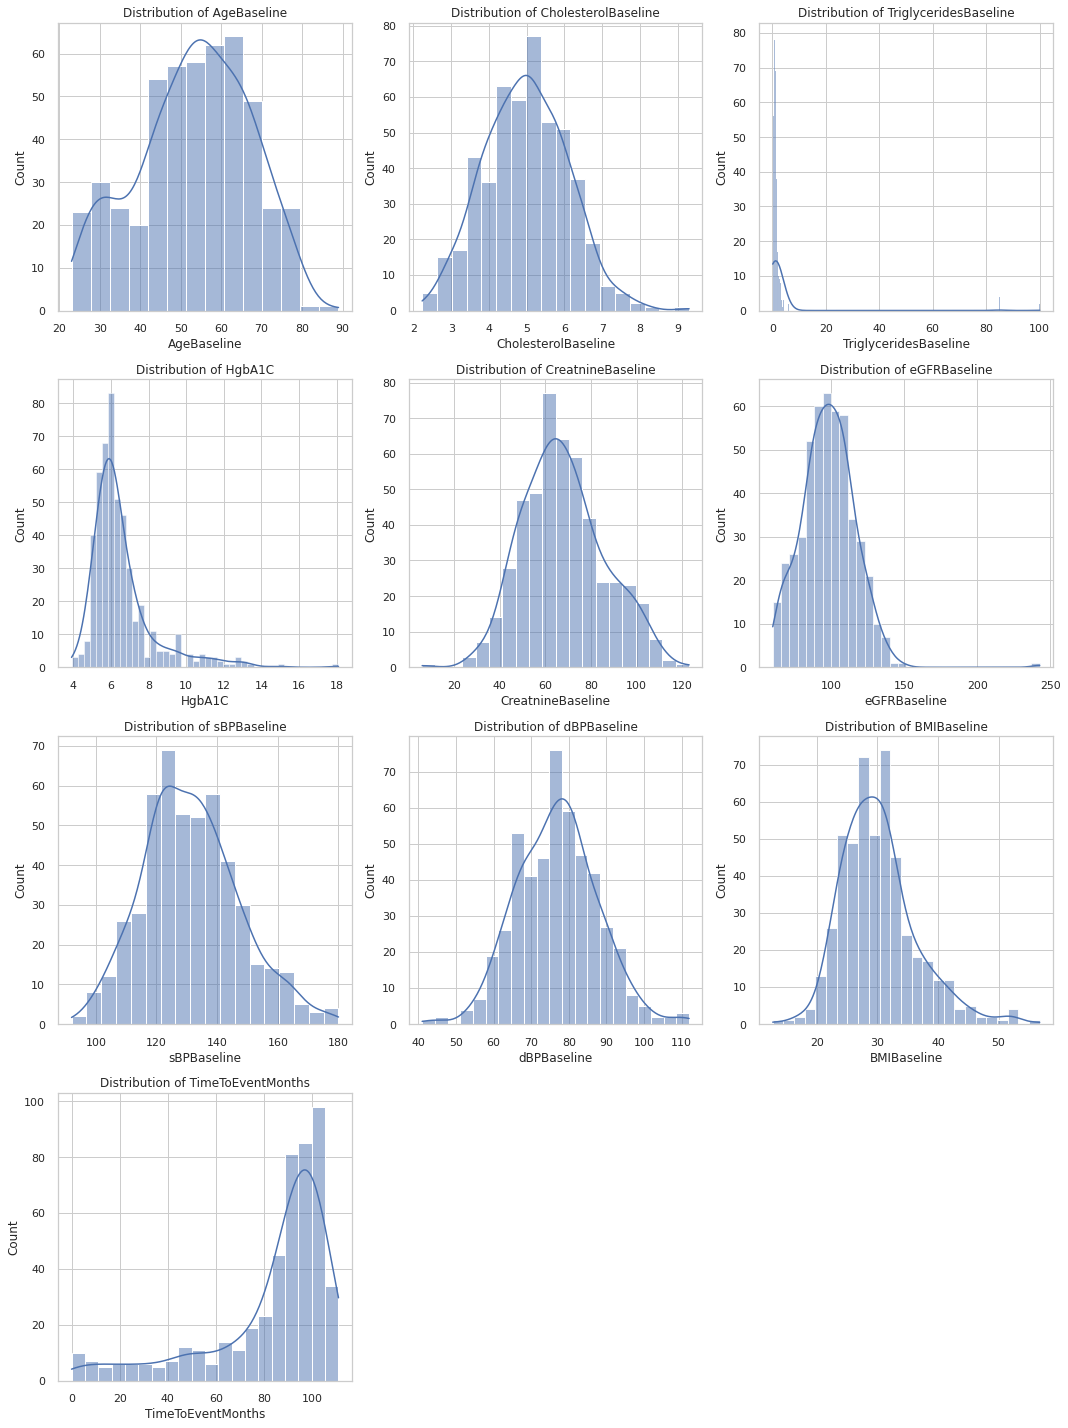

In [217]:
# Visualizing Distributions of Non-Binary Numerical Features
print("\nVisualizing Distributions of Non-Binary Numerical Features:\n")
rows = (len(numerical_cols) + 2) // 3  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Visualizing Boxplots of Non-Binary Numerical Features:


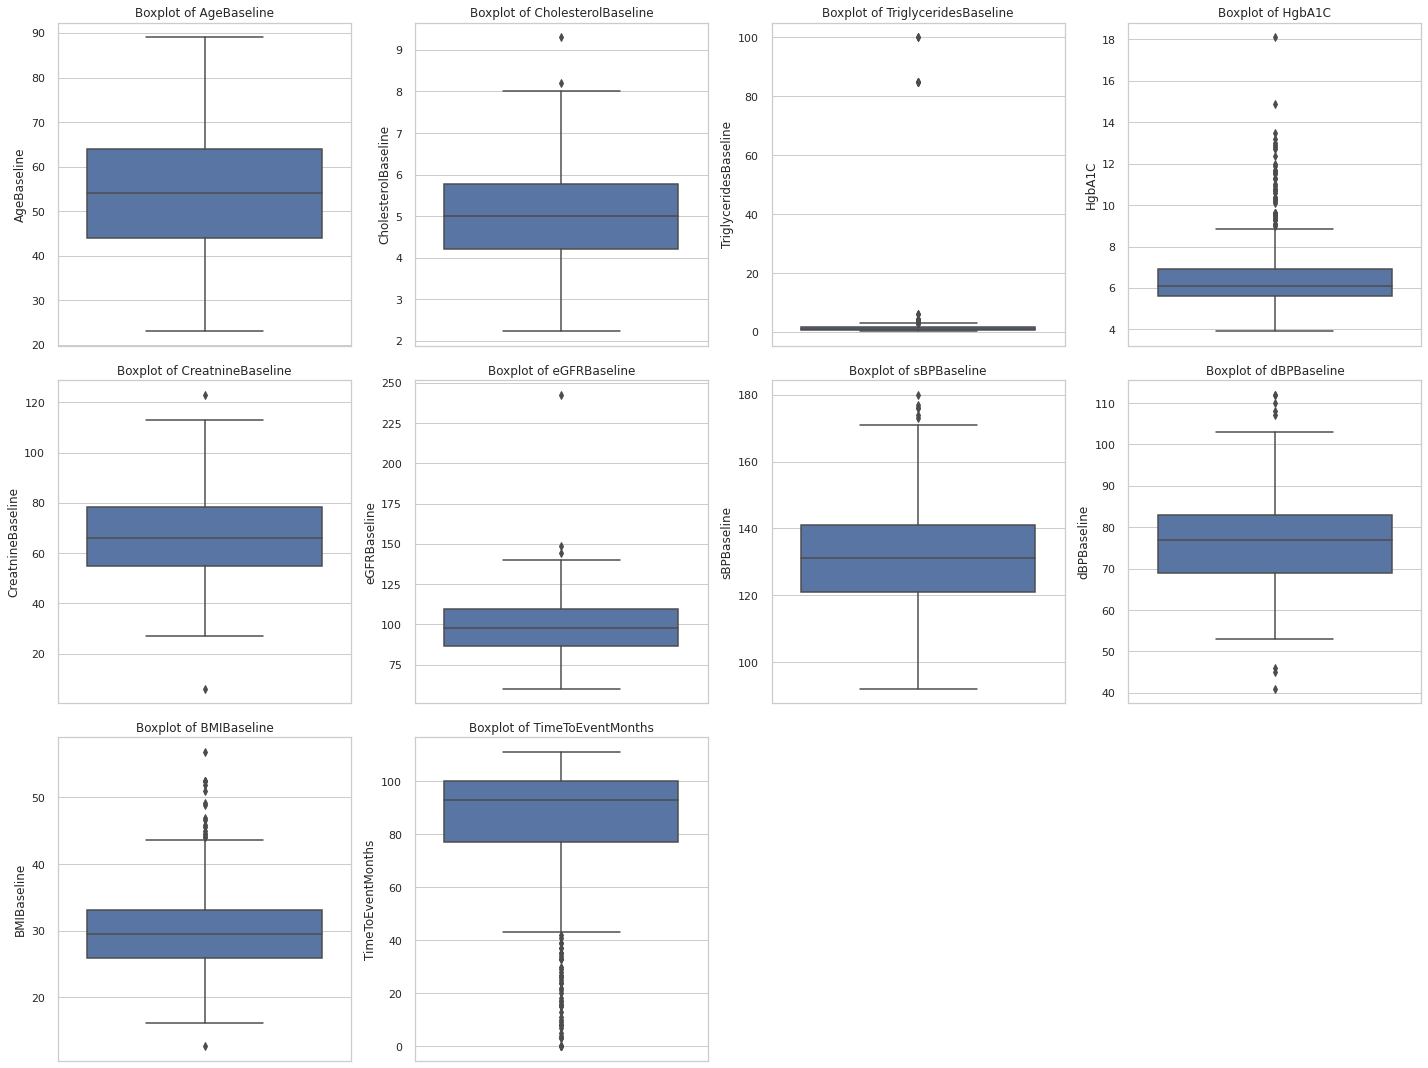

In [218]:
# Visualizing Boxplots of Non-Binary Numerical Features
print("\nVisualizing Boxplots of Non-Binary Numerical Features:")
rows = (len(numerical_cols) + 3) // 4  # Calculate the number of rows needed for 4 plots per row

fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(20, 5 * rows))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [219]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Define a custom color palette
custom_palette = sns.color_palette("Paired")

def plot_pie_charts(dataset, columns, main_title=None, legend_labels=None, legend_title=None):
    num_plots = len(columns)
    rows = (num_plots + 2) // 3  # Calculate number of rows needed for 3 plots per row

    # Create subplots with increased figure size
    fig, axes = plt.subplots(rows, 3, figsize=(22, 6 * rows))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    # Add main headline with increased space from plots, if provided
    if main_title:
        if len(columns)>2:
            fig.suptitle(main_title, fontsize=20, fontweight='bold', y=0.9, ha='center')
        else:
            fig.suptitle(main_title, fontsize=20, fontweight='bold', y=0.98, ha='center')

    for i, col in enumerate(columns):
        counts = dataset[col].value_counts()
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=custom_palette, radius=1)
        axes[i].set_title(f'{col.capitalize()} ', fontweight='bold', fontsize=14, pad=20)

    # Add custom legend title and legend if specified
    if legend_labels and legend_title:
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=custom_palette[i], markersize=10, label=label) for i, label in enumerate(legend_labels)]
        legend = fig.legend(handles=handles, loc='upper center', ncol=len(legend_labels), bbox_to_anchor=(0.72, 0.9), fontsize=12)
        legend.set_title(legend_title, prop={'size': 12, 'weight': 'bold'})

    # Turn off axes for any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    # Adjust spacing between subplots and main title
    plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.05, wspace=0.2, hspace=0.3)
    plt.show()

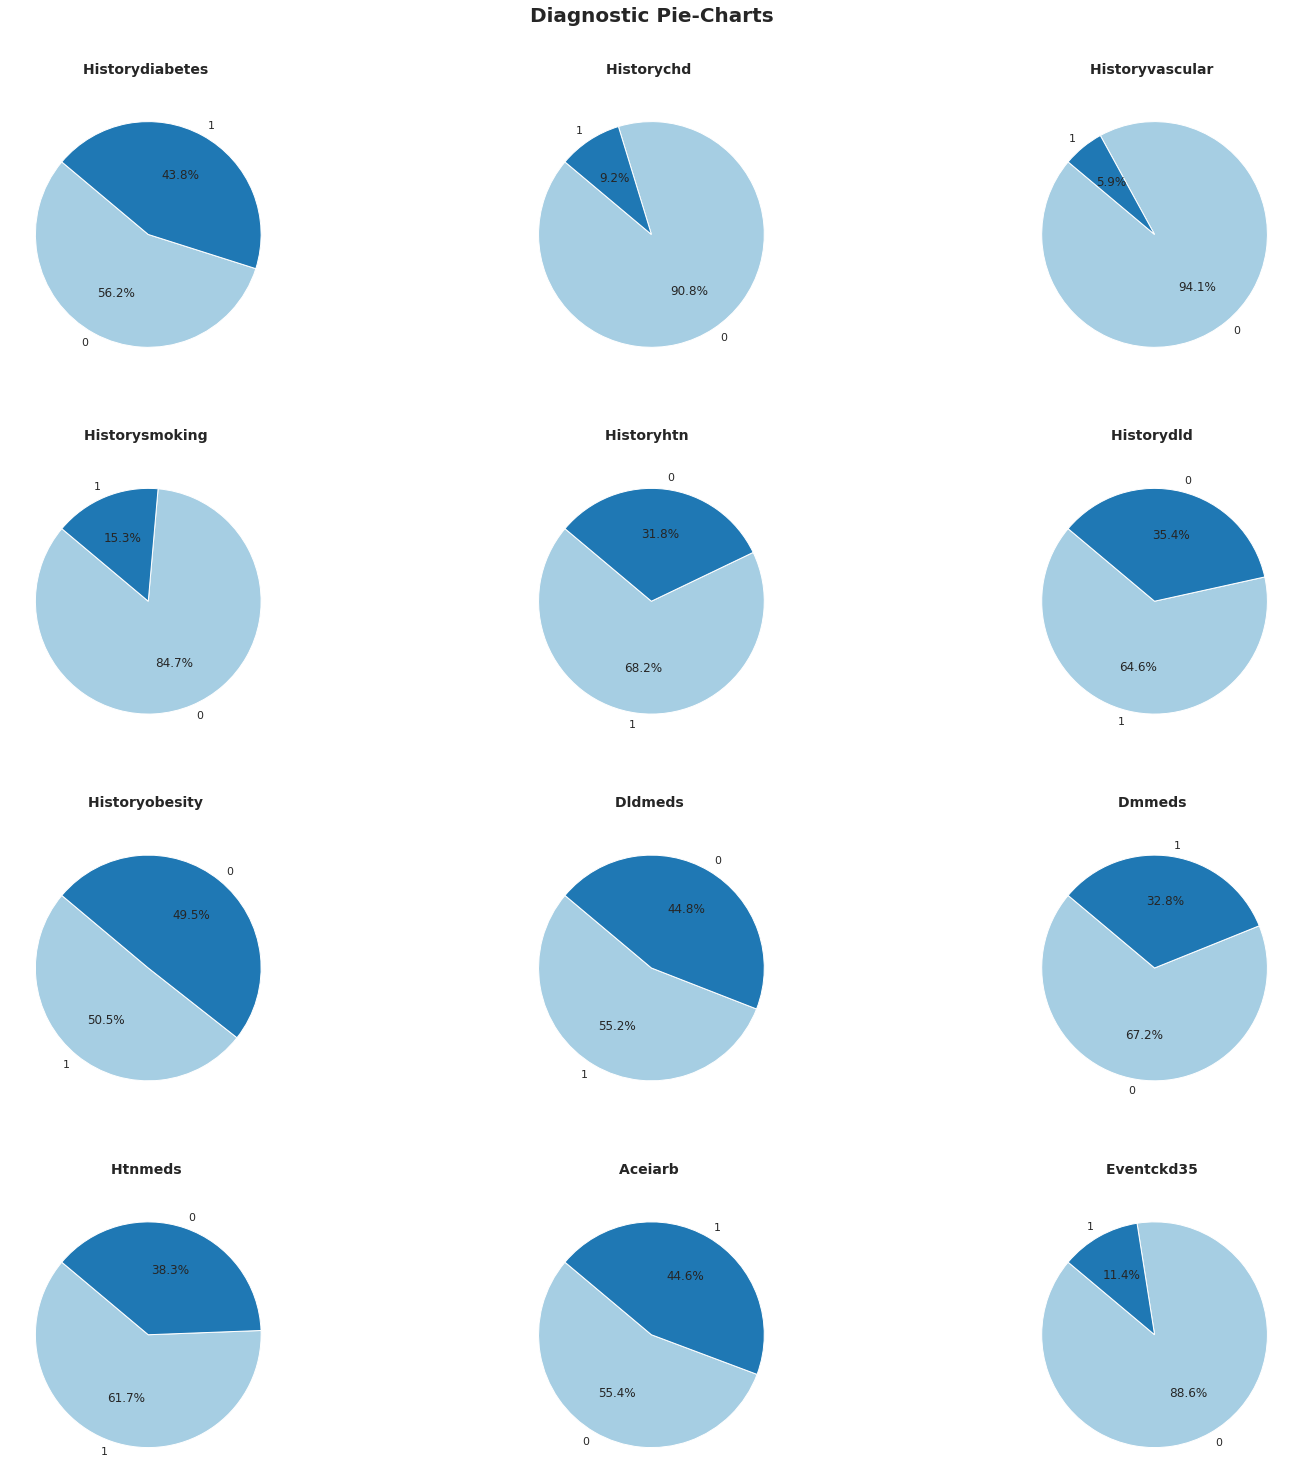

In [220]:
plot_pie_charts(df,categorical_cols[2:],main_title='Diagnostic Pie-Charts')

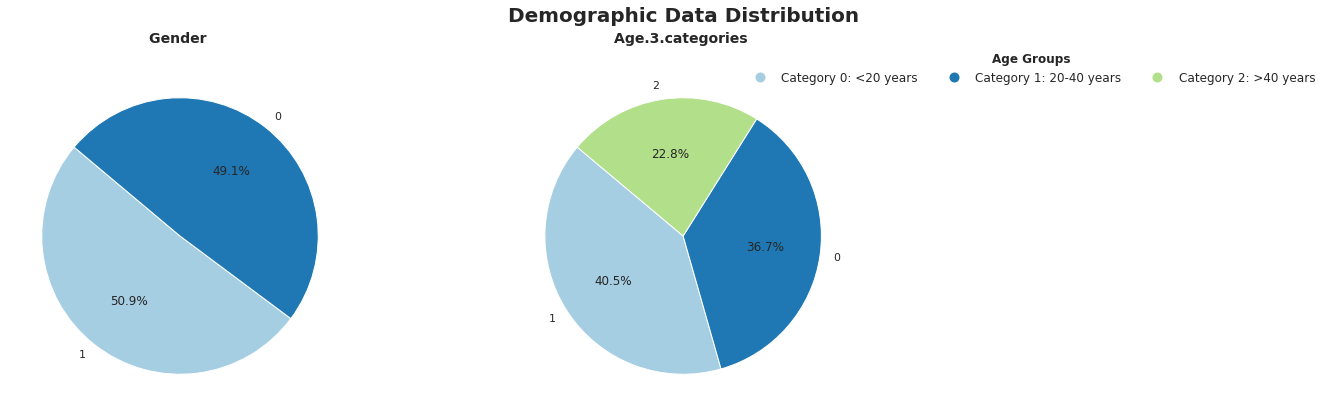

In [221]:
legend_labels = ['Category 0: <20 years', 'Category 1: 20-40 years', 'Category 2: >40 years']
plot_pie_charts(df, ['Gender', 'Age.3.categories'], main_title='Demographic Data Distribution', legend_labels=legend_labels, legend_title='Age Groups')

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>1.4: Outliers</center></h2>

From the distributions above we can spot outlires only in `TriglyceridesBaseline` and `HgbA1C`. Let's remove it.
</div>

In [222]:
def cap_outliers(df, numerical_cols, lower_percentile=0.05, upper_percentile=0.95):
    """
    Caps outliers in the specified numerical columns at the specified percentiles.
    
    Parameters:
    df (DataFrame): The dataframe containing the data.
    numerical_cols (list): List of numerical column names to cap outliers for.
    lower_percentile (float): Lower percentile threshold. Default is 0.025 (2.5%).
    upper_percentile (float): Upper percentile threshold. Default is 0.975 (97.5%).
    
    Returns:
    DataFrame: The dataframe with outliers capped.
    """
    for col in numerical_cols:
        lower_cap = df[col].quantile(lower_percentile)
        upper_cap = df[col].quantile(upper_percentile)
        
        df[col] = df[col].apply(lambda x: lower_cap if x < lower_cap else upper_cap if x > upper_cap else x)
        
    return df

# Apply capping to numerical columns
df_capped = cap_outliers(df, numerical_cols)


Visualizing Boxplots of Non-Binary Numerical Features:


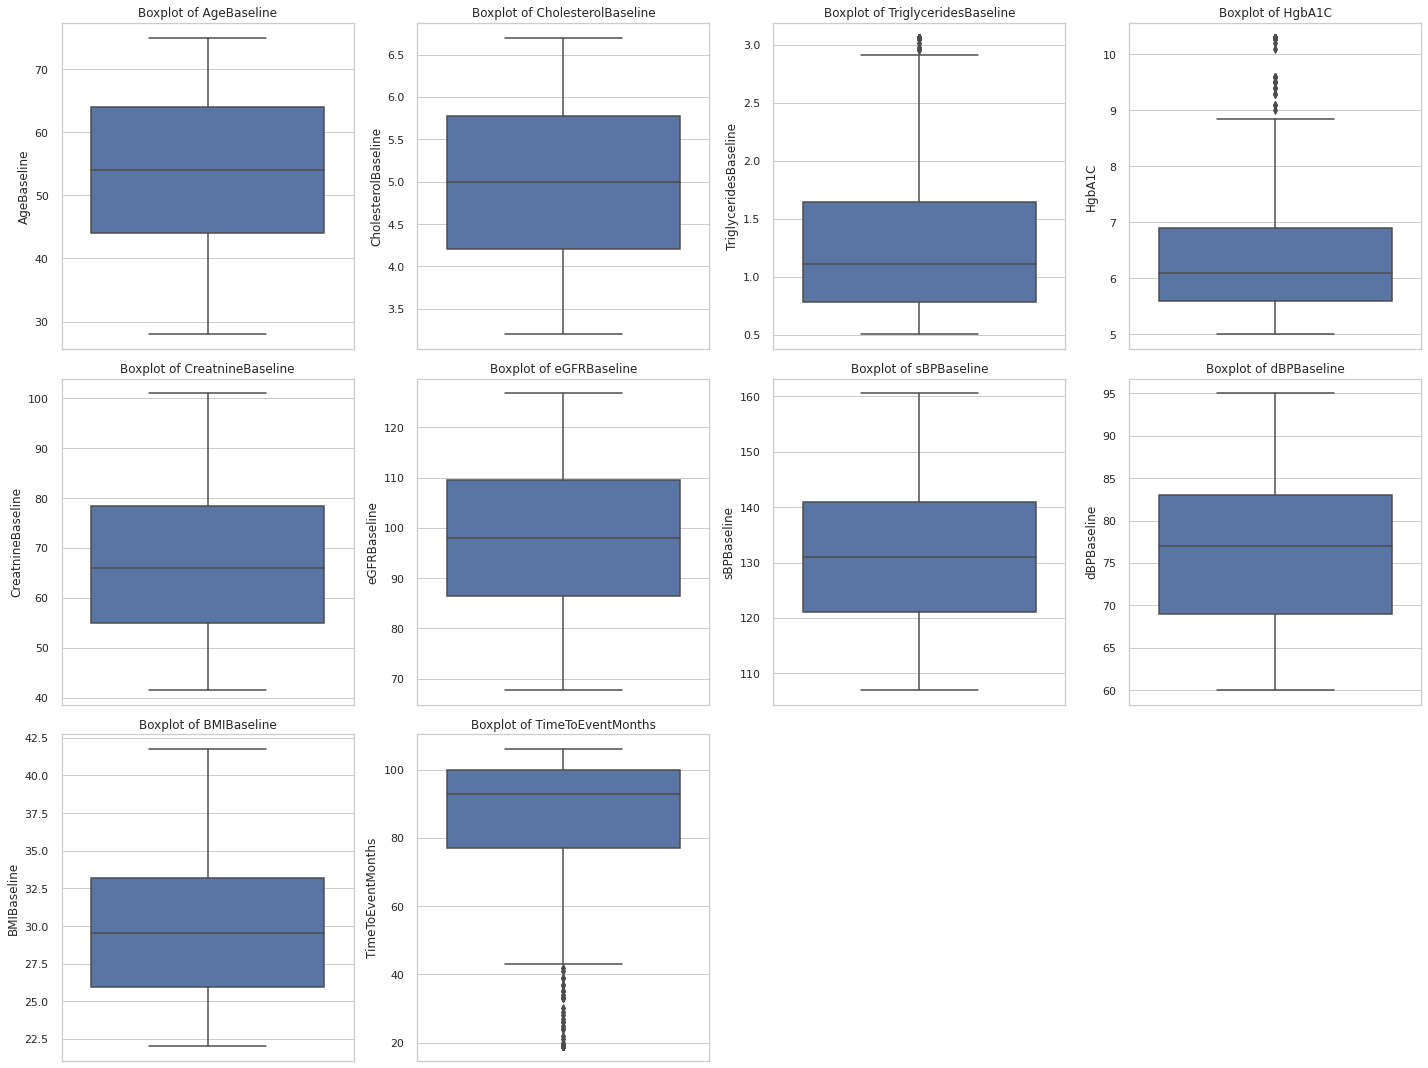

In [223]:
# Visualizing Boxplots of Non-Binary Numerical Features
print("\nVisualizing Boxplots of Non-Binary Numerical Features:")
rows = (len(numerical_cols) + 3) // 4  # Calculate the number of rows needed for 4 plots per row

fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(20, 5 * rows))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>1.5 Categorial Features and Standardization</center></h2>

**Our dataset contains a mix of numerical and categorical features. Let's perform the following steps:**  

1. **Convert Categorical Features to Categorical Type:** We'll convert the columns that represent categorical data (like `Gender`, `HistoryDiabetes`, `HistoryCHD`, etc.) into categorical data type.
2. **Standardize Numerical Features:** We'll standardize the numerical columns (like `CholesterolBaseline`, `TriglyceridesBaseline`, `BMIBaseline`, etc.) using standard scaling, which subtracts the mean and divides by the standard deviation.
   
</div>

In [224]:
df.dtypes

Gender int64
AgeBaseline float64
Age.3.categories int64
HistoryDiabetes int64
HistoryCHD int64
HistoryVascular int64
HistorySmoking int64
HistoryHTN int64
HistoryDLD int64
HistoryObesity int64
DLDmeds int64
DMmeds int64
HTNmeds int64
ACEIARB int64
CholesterolBaseline float64
TriglyceridesBaseline float64
HgbA1C float64
CreatnineBaseline float64
eGFRBaseline float64
sBPBaseline float64
dBPBaseline float64
BMIBaseline float64
TimeToEventMonths float64
EventCKD35 int64
dtype: object

In [225]:
df.columns

Index(['Gender', 'AgeBaseline', 'Age.3.categories', 'HistoryDiabetes',
       'HistoryCHD', 'HistoryVascular', 'HistorySmoking', 'HistoryHTN ',
       'HistoryDLD', 'HistoryObesity', 'DLDmeds', 'DMmeds', 'HTNmeds',
       'ACEIARB', 'CholesterolBaseline', 'TriglyceridesBaseline', 'HgbA1C',
       'CreatnineBaseline', 'eGFRBaseline', 'sBPBaseline', 'dBPBaseline',
       'BMIBaseline', 'TimeToEventMonths', 'EventCKD35'],
      dtype='object')

In [226]:
df['HTNmeds'].value_counts()

1 303
0 188
Name: HTNmeds, dtype: int64

In [227]:
# Convert categorical features to categorical type
df[categorical_cols] = df[categorical_cols].astype('category')

# Standardize numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [228]:
# Verifying columns types
df.dtypes

Gender category
AgeBaseline float64
Age.3.categories category
HistoryDiabetes category
HistoryCHD category
HistoryVascular category
HistorySmoking category
HistoryHTN category
HistoryDLD category
HistoryObesity category
DLDmeds category
DMmeds category
HTNmeds category
ACEIARB category
CholesterolBaseline float64
TriglyceridesBaseline float64
HgbA1C float64
CreatnineBaseline float64
eGFRBaseline float64
sBPBaseline float64
dBPBaseline float64
BMIBaseline float64
TimeToEventMonths float64
EventCKD35 category
dtype: object

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h1 style='border-bottom:1px solid #2F4F4F; color:#2F4F4F; padding-bottom:5px;'><center>2. Feature Selection</center></h1>

Feature selection in classification aims to improve model performance by choosing the most relevant features from data. Combining SelectKBest (a filter method) with Recursive Feature Elimination (RFE, a wrapper method) is effective: SelectKBest filters based on statistical tests like ANOVA, selecting top features known to be statistically significant. This initial filtering reduces dimensionality and noise, making RFE more efficient in its recursive feature elimination process. RFE then refines the selection by recursively eliminating less important features based on model performance, enhancing predictive accuracy and model interpretability. This dual approach balances statistical relevance with predictive power, optimizing feature selection for classification tasks.

Using K Best with Recursive Feature Elimination (RFE) combines the strengths of filter and wrapper methods for efficient feature selection. K Best, a filter method, quickly reduces the feature space by selecting the top k features based on a scoring function, making the dataset more manageable. This initial step simplifies the data, allowing RFE, a wrapper method, to perform more effectively.

Running K Best before RFE removes the least relevant features upfront, enabling RFE to focus on a smaller, more relevant subset. This approach leverages K Best's speed and simplicity and RFE's thoroughness and model-specific optimization, resulting in a more efficient and effective feature selection process.
</div>

In [229]:
df.head()

,Gender,AgeBaseline,Age.3.categories,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,...,CholesterolBaseline,TriglyceridesBaseline,HgbA1C,CreatnineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35
StudyID,,,,,,,,,,,,,,,,,,,,,
1,0,0.809520,1,0,0,0,0,1,1,1,...,-0.166083,-0.558394,-0.424822,-0.534889,-0.269665,0.881091,1.054781,1.887544,0.594563,0
2,0,-0.087882,1,0,0,0,0,1,1,1,...,1.440160,0.749812,-0.351518,-0.953738,0.496033,1.157678,1.469680,2.181157,0.923453,0
3,0,0.211252,1,0,0,0,0,1,1,1,...,1.440160,0.621835,-0.424822,-0.654560,0.129299,1.226825,0.951057,1.958745,0.183451,0
4,0,0.360819,1,0,0,0,0,0,1,1,...,0.135087,-0.131805,-0.718040,-0.175875,-0.453454,-1.055014,-0.915989,0.369432,0.800119,0
5,0,0.734737,1,1,0,0,0,1,1,1,...,0.034697,-0.288221,0.718726,0.123303,-1.101384,0.051332,-1.434612,0.132806,0.882342,0


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h2 style='border-bottom:1px solid #2F4F4F; color:#2F4F4F; padding-bottom:5px;'><center>2.1 SelectKBest</center></h2>

SelectKBest is a feature selection technique in machine learning used to select the top k features that have the strongest relationship with the target variable. Its primary purpose is to reduce the number of features in the dataset to improve model performance, reduce overfitting, and enhance computational efficiency.

Parameters:

<p><b>f_classif:</b> f_classif is a statistical test used in the context of feature selection in machine learning, particularly for classification tasks. </p> 

<p><b>\( k \) :</b> Selecting the optimal number of features \( k \) in `SelectKBest` involves treating \( k \) as a hyperparameter, determined through cross-validation. By iterating over a range of \( k \) values and evaluating each with cross-validation, such as using `f1_macro` as a scoring metric, one can identify the \( k \) that maximizes model performance while preventing overfitting or underfitting. This approach ensures that the selected feature subset balances predictive power with model complexity, enhancing the robustness and generalization capability of the machine learning model.  </p> 



 <p><b>Pros:</b> Selecting \( k \) Best is simple and computationally efficient, ideal for high-dimensional datasets. It quickly identifies top features based on a scoring function, enhancing model interpretability and often improving generalization.  </p> 

  <p><b>Cons:</b> It may miss important feature interactions by evaluating features individually. Its reliance on the chosen scoring function can lead to suboptimal feature selection, affecting model performance.<p>


Optimal number of features (k): 8


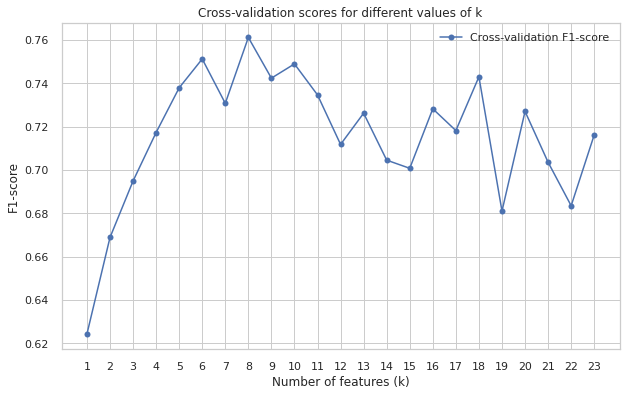

In [230]:
# Separate features (X) and target (y)
X = df.drop(columns=['EventCKD35'])
y = df['EventCKD35']

# Initialize an empty list to store cross-validation scores
cv_scores = []

# Define a range of k values to test
k_values = range(1, len(X.columns) + 1)  # Test all possible values of k

# Loop through each k value
for k in k_values:
    # Create a pipeline with feature selection and a classifier (example with RandomForestClassifier)
    pipeline = Pipeline([
        ('selector', SelectKBest(score_func=f_classif, k=k)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    
    # Perform cross-validation and compute mean F1-score (you can use other scoring metrics as needed)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1_macro')
    cv_scores.append(scores.mean())

# Plotting the cross-validation scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b', label='Cross-validation F1-score')
plt.title('Cross-validation scores for different values of k')
plt.xlabel('Number of features (k)')
plt.ylabel('F1-score')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Determine the optimal k value based on the highest cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optimal number of features (k): {optimal_k}')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


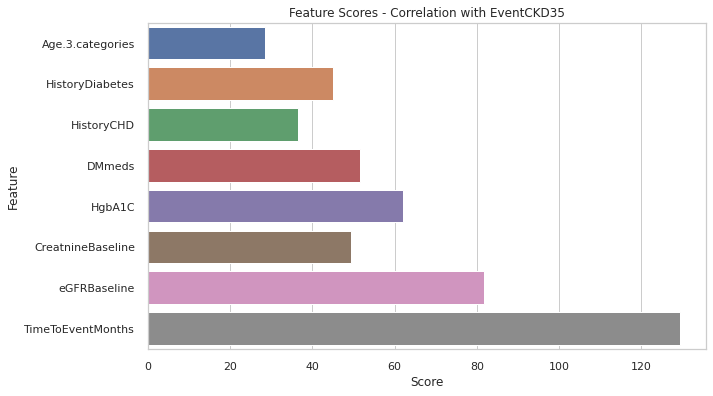

In [231]:
# Apply SelectKBest with f_classif (you can adjust k as needed)
selector = SelectKBest(score_func=f_classif, k=optimal_k)
selector.fit(X, y)

# Get columns to keep and their corresponding scores
selected_columns = X.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

# Create a new DataFrame with selected features and target variable
df_filtered = df[selected_columns]
df_filtered['EventCKD35'] = y  # Adding the target variable

# Plotting the feature scores
plt.figure(figsize=(10, 6))
sns.barplot(x=scores, y=selected_columns, orient='h')
plt.title('Feature Scores - Correlation with EventCKD35')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

In [232]:
df_filtered.head()

,Age.3.categories,HistoryDiabetes,HistoryCHD,DMmeds,HgbA1C,CreatnineBaseline,eGFRBaseline,TimeToEventMonths,EventCKD35
StudyID,,,,,,,,,
1,1,0,0,0,-0.424822,-0.534889,-0.269665,0.594563,0
2,1,0,0,0,-0.351518,-0.953738,0.496033,0.923453,0
3,1,0,0,0,-0.424822,-0.654560,0.129299,0.183451,0
4,1,0,0,0,-0.718040,-0.175875,-0.453454,0.800119,0
5,1,1,0,1,0.718726,0.123303,-1.101384,0.882342,0


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h2 style='border-bottom:1px solid #2F4F4F; color:#2F4F4F; padding-bottom:5px;'><center>2.2 Recursive Feature Elimination (RFE)</center></h2>

Recursive Feature Elimination (RFE) is often employed after `SelectKBest` to further refine feature selection. While `SelectKBest` focuses on selecting a predetermined number \( k \) of top features based on a specific metric (like ANOVA F-value with `f_classif`), RFE complements this by iteratively eliminating less relevant features based on their importance scores obtained from model fitting. This sequential approach helps in systematically reducing the feature space, enhancing model performance, and improving interpretability by retaining only the most informative features. By applying RFE after `SelectKBest`, one can potentially achieve a more refined and optimized feature subset for training machine learning models, thereby improving their robustness and generalization capability.

Parameters:

<p><b>Estimator:</b> This refers to the machine learning model used to assess feature importance and eliminate features. </p> 

<p><b>Number of Features to Select (n_features_to_select) :</b> This hyperparameter determines the desired number of features to retain after RFE completes its iterative process. </p> 

<p><b>Pros:</b> RFE considers feature interactions by recursively removing the least important features, often yielding a more optimal subset and better model performance. It can be adapted to different algorithms, making it versatile.</p> 

<p><b>Cons:</b> RFE is computationally intensive, making it less practical for very large datasets. Its effectiveness depends on the initial model used; an unsuitable model may lead to poor feature selection and degraded performance.</p>


Optimal number of features selected: 4

Selected Featrues: Index(['HistoryDiabetes', 'HgbA1C', 'eGFRBaseline', 'TimeToEventMonths'], dtype='object')


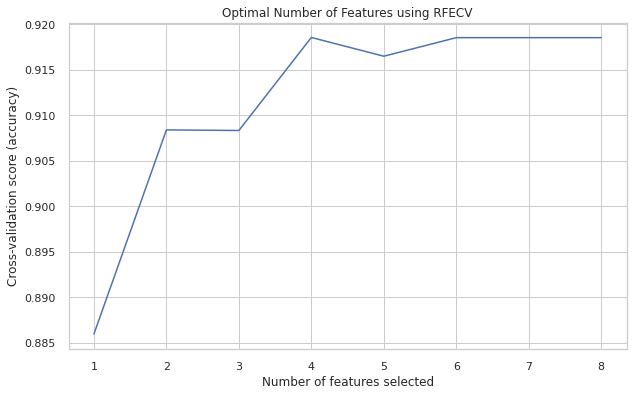

In [233]:
# Assuming df_filtered is your DataFrame containing features and target
# Separate the features and the target variable
X = df_filtered.drop('EventCKD35', axis=1)
y = df_filtered['EventCKD35']

# Initialize the model and RFECV
model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')

# Fit the RFECV model
rfecv.fit(X, y)

# Get selected features
selected_features = X.columns[rfecv.support_]

# Create a DataFrame with selected features and target variable
df_selected_features = pd.DataFrame(data=X[selected_features])
df_selected_features['EventCKD35'] = y


# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title("Optimal Number of Features using RFECV")
plt.show()

# Optimal number of features
optimal_num_features = rfecv.n_features_
print(f"\nOptimal number of features selected: {optimal_num_features}")
print(f"\nSelected Featrues: {selected_features}")

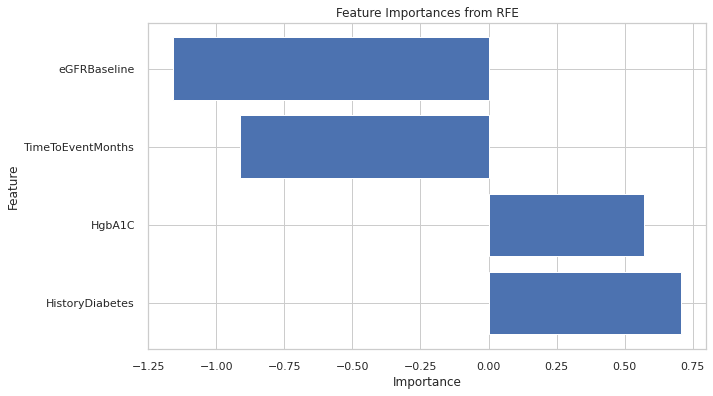

In [234]:
# Get feature importances from RFECV
feature_importances = rfecv.estimator_.coef_[0]

# Create a DataFrame to store feature importances
df_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RFE')
plt.show()

In [235]:
# Output the DataFrame of selected features and target variable
df_selected_features.head()

,HistoryDiabetes,HgbA1C,eGFRBaseline,TimeToEventMonths,EventCKD35
StudyID,,,,,
1,0,-0.424822,-0.269665,0.594563,0
2,0,-0.351518,0.496033,0.923453,0
3,0,-0.424822,0.129299,0.183451,0
4,0,-0.718040,-0.453454,0.800119,0
5,1,0.718726,-1.101384,0.882342,0


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h1 style='border-bottom:1px solid #2F4F4F; color:#2F4F4F; padding-bottom:5px;'><center>3. Class imbalance</center></h1>

### Introduction
Class imbalance is a common problem in machine learning where some classes are underrepresented compared to others. This can lead to biased models that perform poorly on the minority class. To address this, we refer to the article *"Balanced Split: A new train-test data splitting strategy for imbalanced datasets"* by Azal Ahmad Khan from the Indian Institute of Technology, Guwahati.

### Balanced Split Strategy:
According to the article, the balanced split strategy ensures equal representation of all classes in the training dataset. This is crucial for training robust models on imbalanced datasets.

#### Steps for Balanced Split
1. **Identify Unique Classes**: Determine the unique classes in the target variable.
2. **Determine Minority Class Count**: Find the count of the minority class.
3. **Calculate Training Samples**: Calculate the maximum number of samples to include in the training dataset based on the training ratio.
4. **Sample Training Data**: For each class, sample the minority class count instances for training.
5. **Prepare Testing Data**: Use the remaining instances for the testing set.

### Imputing Missing Data
After achieving a balanced split, we proceed with data imputation to handle any missing values. This step is crucial to ensure the dataset is clean and complete for training the models.

### Sampling Techniques
Following the balanced split and imputation, we apply different sampling techniques to further address class imbalance:
1. **Random Over-Sampling**
2. **Random Under-Sampling**
3. **SMOTE (Synthetic Minority Over-sampling Technique)**

</div>

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>3.1 Analyze the Distribution of the Target Variable (Bar Chart)</center></h2>

#### Explanation:
First, we need to understand the distribution of the target variable, `EventCKD35`, to determine if there is a class imbalance. This is crucial because class imbalance can affect the performance of machine learning models.

**Method:**
We will visualize the distribution using a bar chart.
</div>

0    435
1     56
Name: EventCKD35, dtype: int64


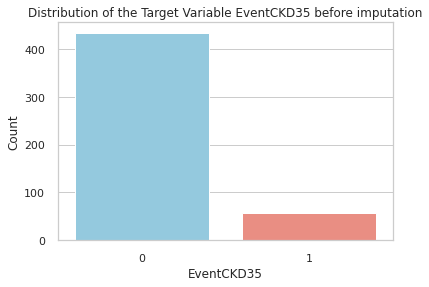

In [236]:
# Analyze the distribution of the target variable 'EventCKD35'
target_distribution = df_selected_features['EventCKD35'].value_counts()

# Define colors for each class
colors = ['skyblue' if x == 0 else 'salmon' for x in target_distribution.index]

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette=colors)
plt.xlabel('EventCKD35')
plt.ylabel('Count')
plt.title('Distribution of the Target Variable EventCKD35 before imputation')
plt.show()

print(target_distribution)

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>3.2 Comparison of Class Imbalance Methods</center></h2>

#### Explanation:
We've decided to examine four different techniques and compare them against each other and with imbalanced data. First of all, it's important to highlight that to prevent overfitting, we applied the imbalance techniques only on the training data.

#### Method:
We compared four different imbalance techniques: 'Over-Sampling', 'Under-Sampling', 'SMOTE'.
</div>

In [237]:
df_selected_features

,HistoryDiabetes,HgbA1C,eGFRBaseline,TimeToEventMonths,EventCKD35
StudyID,,,,,
1,0,-0.424822,-0.269665,0.594563,0
2,0,-0.351518,0.496033,0.923453,0
3,0,-0.424822,0.129299,0.183451,0
4,0,-0.718040,-0.453454,0.800119,0
5,1,0.718726,-1.101384,0.882342,0
...,...,...,...,...,...
959,0,-1.011257,1.520281,0.759008,0
962,0,-0.278213,0.771127,0.430119,0
965,1,2.800571,0.848121,-2.653221,0


In [238]:
df_selected_features.reset_index(drop=True, inplace=True)
df_selected_features.head()

,HistoryDiabetes,HgbA1C,eGFRBaseline,TimeToEventMonths,EventCKD35
0,0,-0.424822,-0.269665,0.594563,0
1,0,-0.351518,0.496033,0.923453,0
2,0,-0.424822,0.129299,0.183451,0
3,0,-0.718040,-0.453454,0.800119,0
4,1,0.718726,-1.101384,0.882342,0


In [239]:
# Split the data into features and target
df_selected_features['HistoryDiabetes'] = df_selected_features['HistoryDiabetes'].astype(int)
X = df_selected_features.drop('EventCKD35', axis=1)
y = df_selected_features['EventCKD35']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [240]:
# Initialize the resampling methods
smote = SMOTE(random_state=13)
under_sampler = RandomUnderSampler(random_state=13)
over_sampler = RandomOverSampler(random_state=13)

# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply Under-sampling
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Apply Over-sampling
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

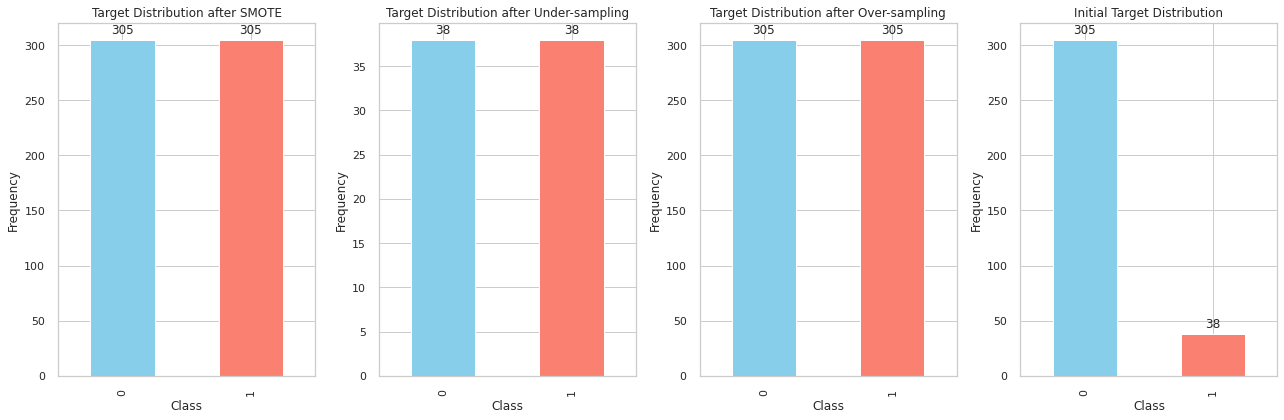

In [241]:
# Function to plot the target distribution side by side with numbers
def plot_distributions(y_list, titles):
    fig, axes = plt.subplots(1, len(y_list), figsize=(18, 6))
    colors = ['skyblue', 'salmon']  # Colors for the two classes

    for i, (y, title) in enumerate(zip(y_list, titles)):
        counts = y.value_counts()
        counts.plot(kind='bar', ax=axes[i], color=colors)
        axes[i].set_title(title)
        axes[i].set_xlabel('Class')
        axes[i].set_ylabel('Frequency')
        for p in axes[i].patches:
            axes[i].annotate(
                str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points'
            )

    plt.tight_layout()
    plt.show()

# Plot the target distributions
plot_distributions(
    [y_train_smote, y_train_under, y_train_over, y_train],
    ['Target Distribution after SMOTE', 'Target Distribution after Under-sampling', 'Target Distribution after Over-sampling', 'Initial Target Distribution']
)

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>Stage 3.2: SMOTE VS Over-sampling </center></h2>

#### Explanation:
SMOTE (Synthetic Minority Over-sampling Technique): This technique generates synthetic examples of the minority class. It can be effective when the dataset is very imbalanced, as it helps the model learn more about the minority class.
On the other hand, Over-sampling: This method increases the number of examples in the minority class by duplicating existing examples. It can help balance the dataset but may lead to overfitting, as the model might become too familiar with the repeated examples.
We didn't want to choose under-sampling because we didn't want to lose data.

**Pros of SMOTE:**
- Realistic Evaluation: The test set provides an unbiased measure of how the model performs on unseen data.
- Clear Model Selection: Ensures the validation set is used solely for tuning, not for final model evaluation.

**Cons of SMOTE:**
- No Fine-Tuning: Using the test set for final evaluation means you can’t use it for model adjustments or hyperparameter tuning.
- Data Leakage Risk: If the test set is used in any way before final evaluation, it can lead to overly optimistic performance estimates.

**Pros of Over-Sampling:**
- Improves Model Performance: Can help the model learn better from the minority class by balancing the class distribution, leading to better performance metrics like recall for the minority class.
- Addresses Imbalanced Data: Helps overcome the issue of class imbalance, which can make the model biased toward the majority class.

**Cons of Over-Sampling:**
- Overfitting Risk: Creating synthetic samples can lead to overfitting, especially if the model learns patterns specific to the synthetic data.
- Increased Computation: Augments the dataset size, which can lead to higher computational costs and longer training times.

**Justification for taking SMOTE:**
SMOTE's synthetic samples are less likely to cause overfitting compared to random duplication of minority class samples.
This approach helps create a more diverse and representative minority class, reducing the risk of overfitting and improving the model's ability to generalize. Additionally, unlike methods that involve under-sampling, SMOTE does not result in any loss of data from the majority class. We've decided to implemente SMOTE only on training data in order to prevent overfitting

</div>

In [242]:
#Indicating which row are real, and which ones are synthetic 
X_train_smote["is_original"] = [True if idx < len(X_train) else False for idx in X_train_smote.index]

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h1 style='border-bottom:1px solid #2F4F4F; color:#2F4F4F; padding-bottom:5px;'><center>4. Model Training and Evaluation</center></h1>
W've decided to compare 4 different models:
<p><b>Logistic Regression:</b> This is a straightforward linear model used for binary classification. It models the probability of a certain class (in our case, `EventCKD35` being 0 or 1) given the predictors.

<p><b>Decision Trees:</b> Decision trees split the data into subsets based on the values of predictors, aiming to create branches that best separate the target classes. They can handle numerical and categorical data.

<p><b>Random Forest:</b> Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

<p><b>Support Vector Machines (SVM):</b> SVMs are effective for high-dimensional spaces and can separate classes by finding the hyperplane that maximizes the margin between classes. They work well for both linearly separable and non-linearly separable data through the kernel trick.

</div>

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>4.1: Initial Training</center></h2>

#### Explanation:
We ran all the models without any hyperparameter tuning, as we wanted to see the model results without any intervention from our side.


</div>

In [243]:

# Extract features and target from the training dataset
X_train_balanced = X_train_smote.drop(columns=['is_original'])
y_train_balanced = y_train_smote

# Define the pipelines for each model
pipelines_initial = {
    'Logistic Regression': Pipeline([
        ('model', LogisticRegression())
    ]),
    'Decision Tree': Pipeline([
        ('model', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline([
        ('model', RandomForestClassifier())
    ]),
    'SVM': Pipeline([
        ('model', SVC(probability=True))
    ])
}

In [244]:

def evaluate_models_with_plots(pipelines, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(20, 5))
    
    for idx, (name, pipeline) in enumerate(pipelines.items()):
        # Fit the pipeline
        pipeline.fit(X_train, y_train)
        
        # Make predictions and calculate probabilities
        y_pred = pipeline.predict(X_test)
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        
        # Print metrics
        print(f'{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.subplot(1, 3, 1)
        plt.plot(fpr, tpr, label=f'{name}')
        
        # Precision-Recall Curve
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
        plt.subplot(1, 3, 2)
        plt.plot(recall_curve, precision_curve, label=f'{name}')
        
        # F1 Score vs. Threshold Plot
        f1_scores = []
        thresholds = []
        for threshold in range(0, 100):
            threshold /= 100
            y_pred_threshold = (y_prob >= threshold).astype(int)
            f1_scores.append(f1_score(y_test, y_pred_threshold))
            thresholds.append(threshold)
        plt.subplot(1, 3, 3)
        plt.plot(thresholds, f1_scores, label=f'{name}')
    
    # Set plot titles and labels
    plt.subplot(1, 3, 1)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    
    plt.subplot(1, 3, 2)
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    
    plt.subplot(1, 3, 3)
    plt.title('F1 Score vs. Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()


Logistic Regression - Accuracy: 0.7150, Precision: 0.7500, Recall: 0.6857, F1 Score: 0.7164
Decision Tree - Accuracy: 0.5950, Precision: 0.6111, Recall: 0.6286, F1 Score: 0.6197
Random Forest - Accuracy: 0.6400, Precision: 0.6737, Recall: 0.6095, F1 Score: 0.6400
SVM - Accuracy: 0.7050, Precision: 0.7500, Recall: 0.6571, F1 Score: 0.7005


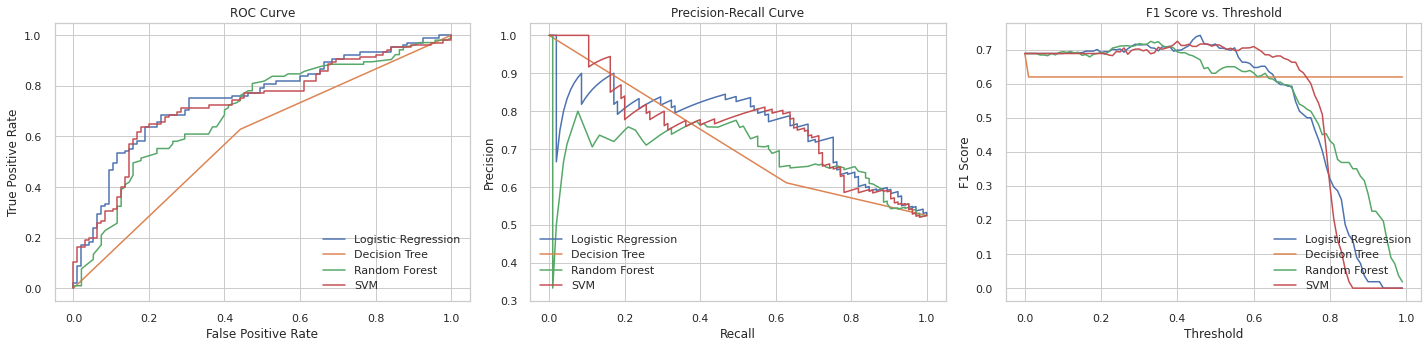

In [266]:
import matplotlib
# Set the default font family to DejaVu Sans
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
Intial_models = evaluate_models_with_plots(pipelines_initial, X_train_balanced, y_train_balanced, X_test, y_test)
Intial_models

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>4.2: Model hyper-tuning </center></h2>

#### Explanation:
hyperparameter tuning enhances classification models by optimizing the hyperparameters that control the learning process of the model. Unlike model parameters, hyperparameters are set before training and influence how the model learns from the data.  This can lead to better accuracy, precision, recall, and overall robustness of the classification model, making it more effective in predicting unseen data.

**Method:**
Hyperparameter tuning can be achieved using cross-validation (CV) to ensure that the model's performance is robust and not overfitting to a particular training set.

#### Logistic Regression
- **penalty**: Specifies the norm used in the penalization (default is 'l2' for Ridge regularization).
- **C**: Inverse of regularization strength; smaller values specify stronger regularization.
- **solver**: Algorithm to use in the optimization problem ('liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg' are common choices depending on the size of the data).
- **max_iter**: Maximum number of iterations taken for the solvers to converge.

#### Decision Tree
- **criterion**: Function to measure the quality of a split ('gini' for Gini impurity, 'entropy' for information gain).
- **max_depth**: Maximum depth of the tree.
- **min_samples_split**: Minimum number of samples required to split an internal node.
- **min_samples_leaf**: Minimum number of samples required to be at a leaf node.

#### Random Forest
- **n_estimators**: Number of trees in the forest.
- **criterion**: Function to measure the quality of a split ('gini' for Gini impurity, 'entropy' for information gain).
- **max_depth**: Maximum depth of the trees.
- **min_samples_split**: Minimum number of samples required to split an internal node.
- **min_samples_leaf**: Minimum number of samples required to be at a leaf node.
- **bootstrap**: Whether bootstrap samples are used when building trees.

#### Support Vector Machine (SVM)
- **C**: Penalty parameter of the error term (controls trade-off between smooth decision boundary and classifying training points correctly).
- **kernel**: Specifies the kernel type ('linear', 'poly', 'rbf', 'sigmoid', etc.).
- **gamma**: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
- **degree**: Degree of the polynomial kernel function ('poly').
- **class_weight**: Weights associated with classes (useful for imbalanced datasets).

**Decision:**
Using GridSearch we will take the best paramter combinations for eahc model
</div>

In [113]:
# Define the pipelines for each model
pipelines_cv = {
    'Logistic Regression': Pipeline([
        ('model', LogisticRegression(max_iter=10000))
    ]),
    'Decision Tree': Pipeline([
        ('model', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline([
        ('model', RandomForestClassifier())
    ]),
    'SVM': Pipeline([
        ('model', SVC(probability=True))
    ])
}

# Define the parameter distributions for each model
param_distributions = {
    'Logistic Regression': {
        'model__penalty': ['l2'],  # Updated to 'l2' only
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['lbfgs', 'saga'],  # 'liblinear' removed as it's not compatible with 'lbfgs'
        'model__max_iter': [500, 1000, 2000]  # Increased max_iter
    },
    'Decision Tree': {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 10, 20, 30, 40, 50],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'model__n_estimators': [10, 50, 100, 200, 300],
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 10, 20, 30, 40, 50],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4],
        'model__bootstrap': [True, False]
    },
    'SVM': {
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'model__gamma': ['scale', 'auto'],  # 'gamma' used for non-linear kernels
        'model__degree': [3, 4, 5],  # 'degree' used for 'poly' kernel
        'model__class_weight': [None, 'balanced']
    }
}

# Apply RandomizedSearchCV to each pipeline
best_models = {}
for model_name, pipeline in pipelines_cv.items():
    randomized_search = RandomizedSearchCV(
        pipeline, param_distributions[model_name], cv=3, scoring='precision', n_jobs=-1
    )
    randomized_search.fit(X_train_balanced, y_train_balanced)
    best_models[model_name] = randomized_search.best_estimator_
    print(f"Best parameters for {model_name}: {randomized_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {randomized_search.best_score_}")
    print('----------------------------------------------------------------------------')

Best parameters for Logistic Regression: {'model__solver': 'saga', 'model__penalty': 'l2', 'model__max_iter': 2000, 'model__C': 1}
Best cross-validation score for Logistic Regression: 0.8612311437153162
----------------------------------------------------------------------------
Best parameters for Decision Tree: {'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 50, 'model__criterion': 'entropy'}
Best cross-validation score for Decision Tree: 0.889283986009274
----------------------------------------------------------------------------
Best parameters for Random Forest: {'model__n_estimators': 10, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_depth': 20, 'model__criterion': 'entropy', 'model__bootstrap': True}
Best cross-validation score for Random Forest: 0.9094059630324622
----------------------------------------------------------------------------
Best parameters for SVM: {'model__kernel': 'poly', 'model__gamma': 'scale', '

In [114]:
best_models

{'Logistic Regression': Pipeline(steps=[('model',
                  LogisticRegression(C=1, max_iter=2000, solver='saga'))]),
 'Decision Tree': Pipeline(steps=[('model',
                  DecisionTreeClassifier(criterion='entropy', max_depth=50,
                                         min_samples_leaf=4,
                                         min_samples_split=5))]),
 'Random Forest': Pipeline(steps=[('model',
                  RandomForestClassifier(criterion='entropy', max_depth=20,
                                         min_samples_split=10,
                                         n_estimators=10))]),
 'SVM': Pipeline(steps=[('model',
                  SVC(C=1, class_weight='balanced', kernel='poly',
                      probability=True))])}

In [115]:
# Define the pipelines for each model
pipelines_hyper_tuned = {
    'Logistic Regression': Pipeline([
        ('model', LogisticRegression(
            penalty=best_models['Logistic Regression'].named_steps['model'].penalty,
            C=best_models['Logistic Regression'].named_steps['model'].C,
            solver=best_models['Logistic Regression'].named_steps['model'].solver,
            max_iter=best_models['Logistic Regression'].named_steps['model'].max_iter
        ))
    ]),
    'Decision Tree': Pipeline([
        ('model', DecisionTreeClassifier(
            criterion=best_models['Decision Tree'].named_steps['model'].criterion,
            max_depth=best_models['Decision Tree'].named_steps['model'].max_depth,
            min_samples_split=best_models['Decision Tree'].named_steps['model'].min_samples_split,
            min_samples_leaf=best_models['Decision Tree'].named_steps['model'].min_samples_leaf
        ))
    ]),
    'Random Forest': Pipeline([
        ('model', RandomForestClassifier(
            n_estimators=best_models['Random Forest'].named_steps['model'].n_estimators,
            criterion=best_models['Random Forest'].named_steps['model'].criterion,
            max_depth=best_models['Random Forest'].named_steps['model'].max_depth,
            min_samples_split=best_models['Random Forest'].named_steps['model'].min_samples_split,
            min_samples_leaf=best_models['Random Forest'].named_steps['model'].min_samples_leaf,
            bootstrap=best_models['Random Forest'].named_steps['model'].bootstrap
        ))
    ]),
    'SVM': Pipeline([
        ('model', SVC(
            C=best_models['SVM'].named_steps['model'].C,
            kernel=best_models['SVM'].named_steps['model'].kernel,
            gamma=best_models['SVM'].named_steps['model'].gamma,
            degree=best_models['SVM'].named_steps['model'].degree,
            class_weight=best_models['SVM'].named_steps['model'].class_weight,
            probability=best_models['SVM'].named_steps['model'].probability
        ))
    ])
}

Logistic Regression - Accuracy: 0.7350, Precision: 0.7660, Recall: 0.6990, F1 Score: 0.7310
Decision Tree - Accuracy: 0.6650, Precision: 0.6957, Recall: 0.6214, F1 Score: 0.6564
Random Forest - Accuracy: 0.6950, Precision: 0.6944, Recall: 0.7282, F1 Score: 0.7109
SVM - Accuracy: 0.7150, Precision: 0.6983, Recall: 0.7864, F1 Score: 0.7397


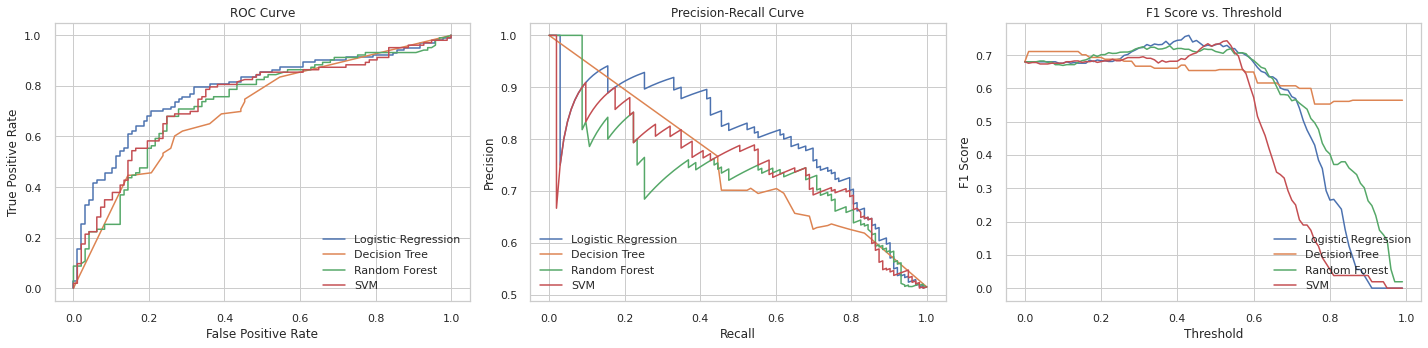

In [268]:
# Create the plots
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
hypertuned_models = evaluate_models_with_plots(pipelines_hyper_tuned, X_train_balanced, y_train_balanced, X_test, y_test)
hypertuned_models

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>4.3: Model without Class Imbalance</center></h2>
Finally, we wanted to check our models without any imbalance preprocessing
</div>

In [117]:
# Split the data into features and target
X = df_selected_features.drop('EventCKD35', axis=1)
y = df_selected_features['EventCKD35']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

Logistic Regression - Accuracy: 0.9122, Precision: 0.8889, Recall: 0.4000, F1 Score: 0.5517
Decision Tree - Accuracy: 0.8851, Precision: 0.6154, Recall: 0.4000, F1 Score: 0.4848
Random Forest - Accuracy: 0.9122, Precision: 0.8889, Recall: 0.4000, F1 Score: 0.5517
SVM - Accuracy: 0.9054, Precision: 0.8750, Recall: 0.3500, F1 Score: 0.5000


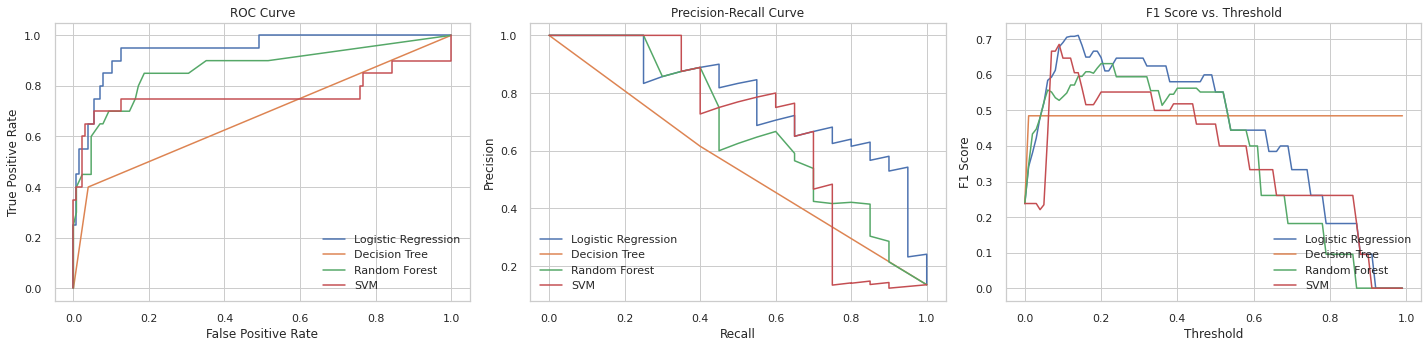

In [118]:
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
imbalnced_models = evaluate_models_with_plots(pipelines_initial, X_train, y_train, X_test, y_test)
imbalnced_models

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
As you can see, the results are worse. Imbalance methods are crucial for predicting Chronic Kidney Disease (CKD) because standard models often miss minority class cases in imbalanced datasets, leading to poor detection of actual CKD cases. Techniques like SMOTE help ensure better identification of CKD, enabling timely and effective medical interventions.</div>



<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h1 style='border-bottom:1px solid #2F4F4F; color:#2F4F4F; padding-bottom:5px;'><center>5. Explanatory AI</center></h1>

<p><b>Description:</b> Explanatory AI helps people understand how AI makes decisions. It makes the decision-making process clear and transparent, building trust and making it easier for humans to work with AI. By explaining the reasoning behind its choices, explanatory AI makes these systems more accessible and reliable for everyone.


**Methods:**
#### Feature Importance
Methods like LIME (Local Interpretable Model-agnostic Explanations) and SHAP (SHapley Additive exPlanations) highlight which features (input variables) are most influential in the model's predictions.

#### Rule Extraction
These techniques extract human-readable rules from complex models. For example, decision trees or rule-based systems can be derived from neural networks to explain their decisions

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>5.1 Shap</h2>

SHAP values for Logistic Regression
SHAP values for Decision Tree
SHAP values for Random Forest
SHAP values for SVM


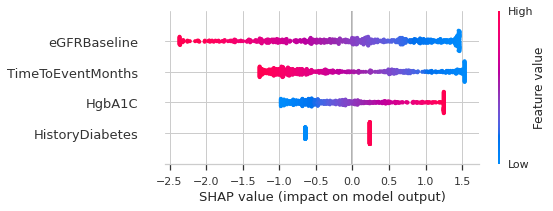

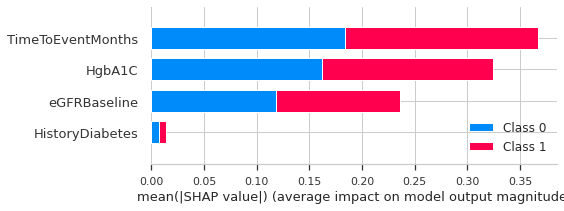

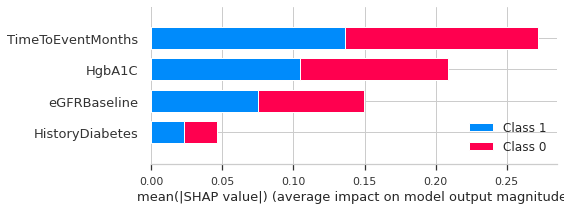

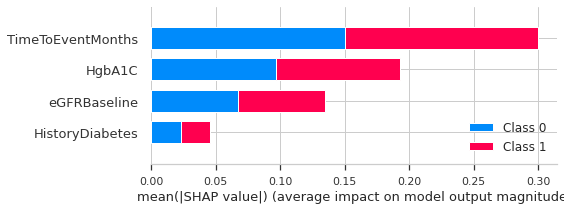

In [119]:
# Summarize the background data to K samples
K = 100  # Adjust K to balance between runtime and explanation accuracy
background = shap.sample(X_train_balanced, K)

# Create SHAP explainers for each model and visualize
for model_name, pipeline in pipelines_initial.items():
    print(f"SHAP values for {model_name}")
    
    # Extract the trained model
    model = pipeline.named_steps['model']
    
    # Use the appropriate SHAP explainer
    if model_name == 'Logistic Regression':
        explainer = shap.Explainer(model, background)
    elif model_name == 'Decision Tree':
        explainer = shap.TreeExplainer(model)
    elif model_name == 'Random Forest':
        explainer = shap.TreeExplainer(model)
    elif model_name == 'SVM':
        explainer = shap.KernelExplainer(model.predict_proba, background)
    
    # Calculate SHAP values
    shap_values = explainer.shap_values(X_train_balanced)
    
    # Visualize SHAP summary plot
    shap.summary_plot(shap_values, X_train_balanced, feature_names=X_train_balanced.columns)
    plt.show()

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>5.2 SHAP Discussion & Comparison </center></h2>
<h2>Logistic Regression:</h2>
<ul>
<li><b>eGFRBaseline:</b> Higher values of eGFRBaseline (red dots) have a negative SHAP value, meaning they decrease the probability of predicting class 1 (reduce the model output).</li>
<li><b>TimeToEventMonths:</b> Higher values (red dots) increase the probability of predicting class 1 (increase the model output).</li>
<li><b>HgbA1C:</b> Both high and low values can either increase or decrease the probability of predicting class 1, indicating a non-linear relationship.</li>
<li><b>HistoryDiabetes:</b> Having a history of diabetes (red dots) decreases the probability of predicting class 1.</li>
</ul>

<h2>Decision Tree:</h2>
<ul>
<li><b>TimeToEventMonths:</b> Higher values increase the probability of predicting class 1.</li>
<li><b>HgbA1C:</b> Higher values tend to decrease the probability of predicting class 1.</li>
<li><b>eGFRBaseline:</b> Similar to Logistic Regression, higher values decrease the probability of predicting class 1.</li>
<li><b>HistoryDiabetes:</b> Having a history of diabetes has minimal impact, but when it does, it decreases the probability of predicting class 1.</li>
</ul>

<h2>Random Forest:</h2>
<ul>
<li><b>TimeToEventMonths:</b> Higher values significantly increase the probability of predicting class 1.</li>
<li><b>HgbA1C:</b> Both high and low values have varying impacts, with higher values generally decreasing the probability of predicting class 1.</li>
<li><b>eGFRBaseline:</b> Higher values decrease the probability of predicting class 1.</li>
<li><b>HistoryDiabetes:</b> Similar to the Decision Tree, it has a minimal but generally negative impact.</li>
</ul>

<h2>SVM:</h2>
<ul>
<li><b>TimeToEventMonths:</b> Higher values have the most significant positive impact on the probability of predicting class 1.</li>
<li><b>HgbA1C:</b> Higher values have a negative impact on the probability of predicting class 1.</li>
<li><b>eGFRBaseline:</b> Higher values decrease the probability of predicting class 1.</li>
<li><b>HistoryDiabetes:</b> Having a history of diabetes generally decreases the probability of predicting class 1.</li>
</ul>

<h2>General Observations:</h2>
<ul>
<li><b>TimeToEventMonths:</b> Consistently the most influential feature across all models, with higher values increasing the likelihood of predicting class 1.</li>
<li><b>eGFRBaseline:</b> Tends to have a negative impact on the model output across all models, decreasing the likelihood of predicting class 1.</li>
<li><b>HgbA1C:</b> Shows a more complex relationship, with its impact varying more across models.</li>
<li><b>HistoryDiabetes:</b> Generally has a smaller impact compared to other features but tends to push the model output towards predicting class 0.</li>
</ul>

</div>

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>5.3 Clinical Relevance </center></h2>

### TimeToEventMonths:

- Clinical Insight: The strong influence of TimeToEventMonths on the models’ predictions suggests that the time to a clinical event (such as a follow-up or the occurrence of a specific medical condition) is a critical predictor.
- Clinical Action: Clinicians should monitor patients closely as the time to a critical event approaches. Timely interventions based on this feature can potentially improve patient outcomes.

### HgbA1C:

- Clinical Insight: HgbA1C is a measure of blood sugar levels over the past three months. Higher HgbA1C values indicate poor blood sugar control, which is a known risk factor for various complications, especially in diabetic patients.
- Clinical Action: Regular monitoring and management of blood sugar levels are crucial. Interventions to lower HgbA1C, such as medication adjustments, lifestyle changes, and dietary modifications, can help in mitigating risks.

### eGFRBaseline:

- Clinical Insight: eGFRBaseline is a measure of kidney function. Lower eGFR values indicate impaired kidney function, which is associated with worse clinical outcomes.
- Clinical Action: Patients with lower eGFR should be monitored for kidney function deterioration and managed appropriately to slow down the progression of kidney disease. This might include medication adjustments, dietary changes, and managing comorbid conditions like hypertension and diabetes.

### HistoryDiabetes:

- Clinical Insight: A history of diabetes is a well-known risk factor for various complications, including cardiovascular diseases, kidney disease, and neuropathy. Its impact on model predictions indicates its importance as a comorbid condition.
- Clinical Action: Patients with a history of diabetes should receive comprehensive care that includes regular monitoring of blood sugar levels, management of risk factors, and preventive measures to avoid complications.
</div>

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h1 style='border-bottom:1px solid #2F4F4F; color:#2F4F4F; padding-bottom:5px;'><center>6. Sub-group Analysis</center></h1>


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>6.1 Kmeans</h2>
<p><b>Description:</b> K-means clustering is instrumental in CKD research and healthcare by organizing patients into distinct groups based on shared health parameters. This method enables the identification of patient clusters with similar disease characteristics, aiding in understanding CKD progression stages, identifying risk factors, and tailoring treatment strategies. By clustering patients, healthcare professionals can stratify them into appropriate care plans, personalize interventions based on cluster profiles, and uncover novel insights into disease patterns and management approaches. This data driven approach enhances both research endeavors and clinical decision-making, ultimately aiming to improve outcomes and quality of life for CKD patients.


**Methods:**
#### Principal Component Analysis (PCA) 
PCA is a statistical method used to simplify datasets by reducing the number of variables (or dimensions) while preserving important patterns and trends. It transforms high-dimensional data into a smaller set of new variables, called principal components, which capture the most variation in the original data. This reduction helps in visualizing and understanding the data more effectively, especially when dealing with datasets with many features.

#### Elbow Method
The Elbow Method is used to determine the optimal number of clusters in a dataset by identifying the point where increasing the number of clusters no longer provides significant improvement

In [120]:
train_data = pd.concat([X_train_smote, y_train_smote], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
final_df = pd.concat([train_data, test_data], axis=0)

In [121]:
final_df

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.


,HistoryDiabetes,HgbA1C,eGFRBaseline,TimeToEventMonths,is_original,EventCKD35
0,0,-0.864648,-0.047042,0.512341,True,0
1,0,-0.278213,-0.047275,0.306785,True,0
2,1,1.041266,-1.774368,-2.653221,True,1
3,1,0.689405,-0.905293,0.923453,True,0
4,0,-0.937953,-0.602155,0.923453,True,0
...,...,...,...,...,...,...
97,0,-0.278213,0.818071,-2.283221,NaN,0
405,0,-0.424822,0.400673,0.347896,NaN,0
483,1,0.161613,-0.208450,0.882342,NaN,0
31,1,0.015004,-0.465802,0.553452,NaN,0


In [122]:
final_df.head()

,HistoryDiabetes,HgbA1C,eGFRBaseline,TimeToEventMonths,is_original,EventCKD35
0,0,-0.864648,-0.047042,0.512341,True,0
1,0,-0.278213,-0.047275,0.306785,True,0
2,1,1.041266,-1.774368,-2.653221,True,1
3,1,0.689405,-0.905293,0.923453,True,0
4,0,-0.937953,-0.602155,0.923453,True,0


In [123]:
X = final_df.drop(columns='is_original')
X = X.astype(float)

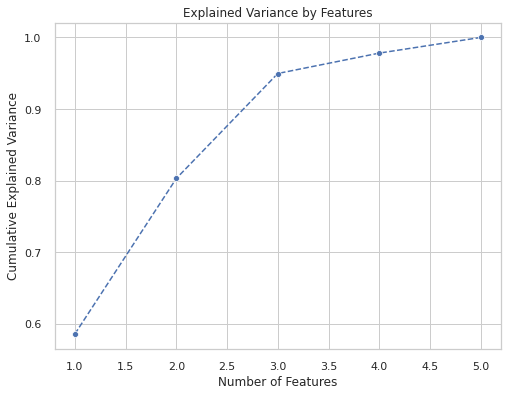

In [124]:
# Creating graph to know explained variance with different number of features of PCA
pca = PCA()
pca.fit(X)

cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, len(cumulative_variance) + 1), y=cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Features')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [125]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

print('Cumulative variance explained by {} principal components: {:.2%}'.format(len(pca.explained_variance_ratio_), np.sum(pca.explained_variance_ratio_)))
 
# Convert it to a Pandas DataFrame
X_processed_df = pd.DataFrame(X, columns=['Feature_{}'.format(i) for i in range(final_df.shape[1])])

Explained variation per principal component: [0.58567328 0.21730811 0.14666017]
Cumulative variance explained by 3 principal components: 94.96%


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">

We decided to take 3 principal components because they explain 95% of the variance in the data, which is a very good metric for PCA. This high level of variance explained indicates that these three components capture most of the important information in the dataset. Additionally, using three principal components allows us to visualize the data in a 3D scatter plot, providing a clear and insightful representation of the underlying structure and patterns within the data.

In [126]:
# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

# Create a DataFrame to store PCA results
dataset_pca = pd.DataFrame(abs(pca.components_), columns=X.columns, index=['PC_1', 'PC_2','PC_3'])
dataset_pca

,HistoryDiabetes,HgbA1C,eGFRBaseline,TimeToEventMonths,EventCKD35
PC_1,0.194486,0.538297,0.467672,0.628692,0.241746
PC_2,0.207246,0.769788,0.211767,0.565357,0.000861
PC_3,0.008819,0.146968,0.845132,0.513471,0.020549


In [127]:
important_features = {}

print('Most important features for each component:')
for pc_number, pc_features in dataset_pca[dataset_pca > 0.1].iterrows():
    pc_dict = {}
    features = pc_features.dropna()
    if not features.empty:
        for feature, value in features.items():
            pc_dict[feature] = value
    else:
        pc_dict["No features above 0.1"] = None
    important_features[f'{pc_number}'] = pc_dict

for pc, features in important_features.items():
    print(f"{pc}: {features}\n")

Most important features for each component:
PC_1: {'HistoryDiabetes': 0.19448645114923976, 'HgbA1C': 0.5382968122051798, 'eGFRBaseline': 0.4676720170397378, 'TimeToEventMonths': 0.6286919150096086, 'EventCKD35': 0.24174557445514672}

PC_2: {'HistoryDiabetes': 0.20724587513677023, 'HgbA1C': 0.7697884678805971, 'eGFRBaseline': 0.21176655026522007, 'TimeToEventMonths': 0.5653574516190335}

PC_3: {'HgbA1C': 0.14696757318442363, 'eGFRBaseline': 0.8451319182135323, 'TimeToEventMonths': 0.5134710724421142}



<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">

In PCA, each principal component captures a different aspect of variability in the data. PC_1, with its strong loading for 'EventCKD35', suggests that this component might be helpful in understanding or predicting occurrences of 'EventCKD35'.


If 'EventCKD35' appears prominently in PCA 1, it suggests that this feature contributes significantly to the main patterns and variability captured by the first principal component. This indicates a strong relationship between 'EventCKD35' and other variables that also influence PCA 1, highlighting its importance in understanding or predicting related outcomes in the dataset.

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

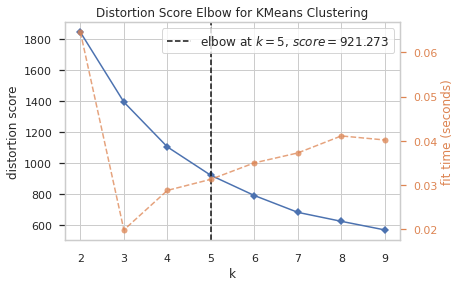

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [128]:
plt.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
# Fit the data to the visualizer
visualizer.fit(X)    
visualizer.show()

In [129]:
# Define and fit the KMeans clustering model
kmeans = KMeans(n_clusters=5, random_state=11, n_init=10)
kmeans_labels = kmeans.fit_predict(pca_result)

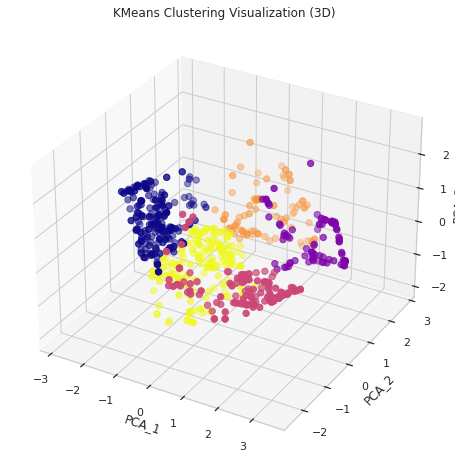

In [130]:
# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', label="bla")
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], s=40, c=kmeans_labels, marker='o', cmap='plasma')
ax.set_title("KMeans Clustering Visualization (3D)")

ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')
plt.show()

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>6.2 Cluster EDA</h2>

In [190]:
# Assign kmeans_labels to a new column named 'Cluster'
final_df['Cluster'] = kmeans_labels

#take only original rows and drop the 'is_original' column
clustered_df = final_df[final_df['is_original'] != False].drop(columns='is_original')

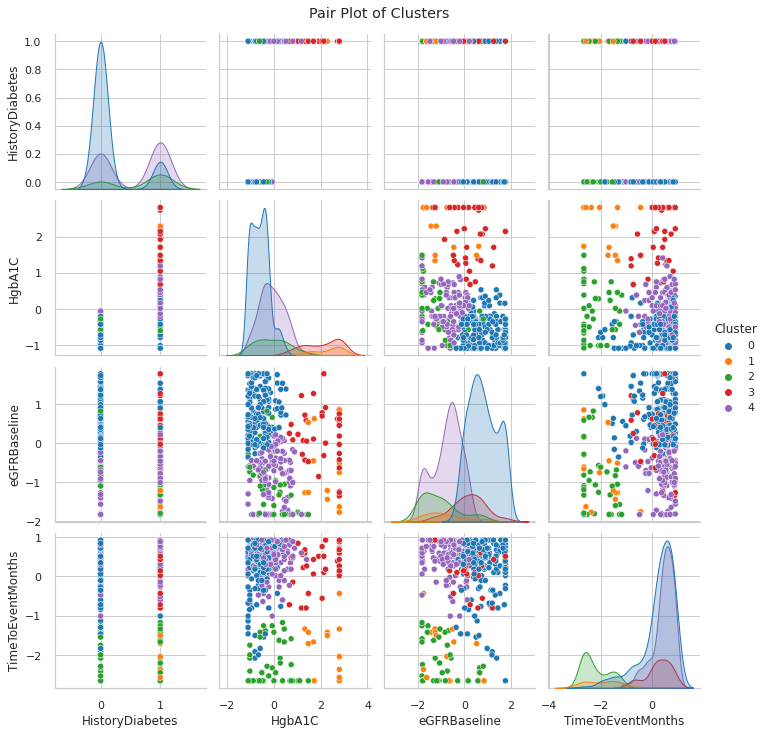

In [191]:
# Pair plot
sns.pairplot(clustered_df, hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">

### Cluster 0 (Blue):
- Low HgbA1C values
- High eGFRBaseline values
- Mostly associated with HistoryDiabetes = 0
- Wide range of TimeToEventMonths, but tends towards higher values
- Largest cluster in terms of number of data points

### Cluster 1 (Orange):
- Moderate HgbA1C values
- Moderate to high eGFRBaseline values
- Associated with HistoryDiabetes = 1
- Distinct distribution in TimeToEventMonths, concentrated at lower values
- Smallest cluster in terms of number of data points

### Cluster 2 (Green):
- Moderate to high HgbA1C values
- Low to moderate eGFRBaseline values
- Mostly associated with HistoryDiabetes = 0
- Wide range of TimeToEventMonths
- Medium-sized cluster

### Cluster 3 (Red):
- Highest HgbA1C values
- Lowest eGFRBaseline values
- Associated with HistoryDiabetes = 1
- Wide range of TimeToEventMonths, but tends towards lower values
- Small to medium-sized cluster

### Cluster 4 (Purple):
- Moderate HgbA1C values
- Low to moderate eGFRBaseline values
- Associated with HistoryDiabetes = 1
- Wide range of TimeToEventMonths
- Medium to large-sized cluster


<div style="border-radius:8px; border:2px solid #2F4F4F; background-color:#F5F5F5; font-size:105%; text-align:justify; padding:15px;">
<h2 style='color:#2F4F4F; padding-bottom:5px;'><center>6.3 Final Model</h2>

Throughout the process, we examined several methods at each stage for most of our decisions we used CV methods for detearmined the best approaches. Eventually, after clustering, we decided to add this feature to the selected features and build a new model with all the insights we gained along the way:

1. The preferred Imbalance method is SMOTE.

2. The best method for predicting is Initial pipeline.

In [193]:
# Split your data into training and test sets
X = clustered_df.drop(columns=['EventCKD35'])
y = clustered_df['EventCKD35']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the column transformer with one-hot encoding for 'Cluster'
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['Cluster']),  # OneHotEncode the 'Cluster' column
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)  # Apply column transformations
])

# Apply preprocessing to the training and test data separately
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)


# Apply SMOTE only to the training data
smote = SMOTE(random_state=11)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

Logistic Regression - Accuracy: 0.7500, Precision: 0.7184, Recall: 0.7789, F1 Score: 0.7475
Decision Tree - Accuracy: 0.7350, Precision: 0.7019, Recall: 0.7684, F1 Score: 0.7337
Random Forest - Accuracy: 0.7800, Precision: 0.7297, Recall: 0.8526, F1 Score: 0.7864
SVM - Accuracy: 0.7900, Precision: 0.7431, Recall: 0.8526, F1 Score: 0.7941


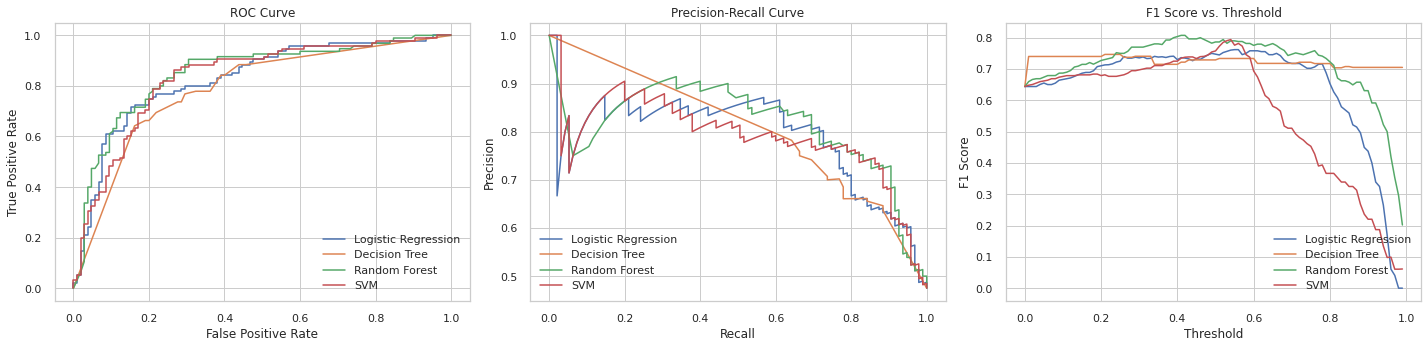

In [270]:
evaluate_models_with_plots(pipelines_hyper_tuned, X_train_resampled, y_train_resampled, X_test_processed, y_test)